<a href="https://colab.research.google.com/github/kh9yaz/124Rus/blob/master/MO_lab_6_18_10_2022_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Задание 6. Задача классификации</h1>

Группа

МИЗ24-01

Фио

Ефимов Константин Алексеевич

Задание 6. Задача классификации

# Импорт необходимых пакетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# sklearn packages
import sklearn.metrics as mtrx # меры качества

# "случайный лес", random forest
from sklearn.ensemble import RandomForestClassifier
# разбиение выборкина обучающую/тестовую
from sklearn.model_selection import train_test_split
# оценка точности классификации
from sklearn.metrics import accuracy_score
# к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# поиск по решетке
from sklearn.model_selection import GridSearchCV

In [2]:
# отключить некоторые предупреждения (это не ошибки, на работу не влияют)
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

# Импорт данных задачи

"Ирисы Фишера" из пакета seaborn

In [3]:
data = sns.load_dataset('iris')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Выделим для удобства аттрибуты и метки класов

In [4]:
attributes = data.drop(columns=['species']).columns.values
print("аттрибуты:", attributes)
labels = 'species'
print("метки:", labels)

аттрибуты: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
метки: species


## Разбивка на обучающую/тестовую выборки

In [5]:
# если данные хранятся в разных массивах numpy
# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25)

# если данные в dataframe
train_data, test_data = train_test_split(data, test_size=0.25)

Выборки формируются каждый раз случайно

In [6]:
train_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
66,5.6,3.0,4.5,1.5,versicolor
31,5.4,3.4,1.5,0.4,setosa


In [7]:
test_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor
49,5.0,3.3,1.4,0.2,setosa


Число примеров разных классов выборках

In [8]:
train_data[labels].value_counts()

,count
species,
setosa,38
versicolor,37
virginica,37


In [9]:
test_data[labels].value_counts()

,count
species,
versicolor,13
virginica,13
setosa,12


<Axes: xlabel='species'>

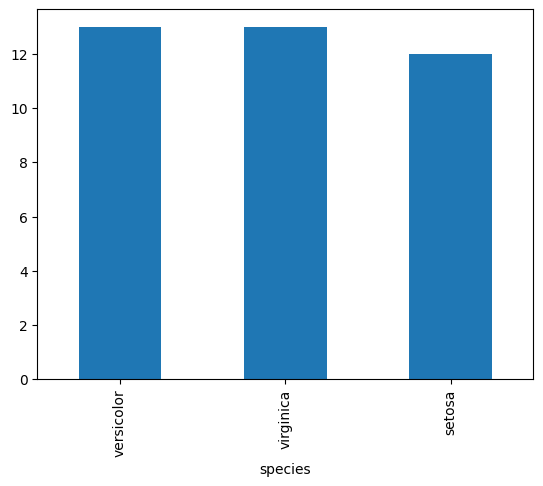

In [10]:
# функция value_counts() возвращает серию dataframe
test_data[labels].value_counts().plot(kind='bar')

Если число классов несбалансировано (число примеров одного из классов сильно больше или меньше, чем других), то используется стратифицированный отбор.

In [11]:
train_data, test_data = train_test_split(data, test_size=0.25,
                                         stratify=data[labels])

In [12]:
train_data[labels].value_counts()

,count
species,
setosa,38
virginica,37
versicolor,37


In [13]:
test_data[labels].value_counts()

,count
species,
virginica,13
versicolor,13
setosa,12


# Алгоритм Random Forest (Случайный лес деревьев решений)

Попытка №1

In [14]:
rf1 = RandomForestClassifier(n_estimators=2)
rf1.fit(train_data[attributes], train_data[labels])

RandomForestClassifier(n_estimators=2)

In [15]:
predicted_labels = rf1.predict(train_data[attributes])
print("точность на обучающей выборке:")
print(accuracy_score(train_data[labels], predicted_labels)*100, '%')

точность на обучающей выборке:
94.64285714285714 %


In [16]:
predicted_labels = rf1.predict(test_data[attributes])
print("точность на тестовой выборке (обобщение, generalization):")
print(accuracy_score(test_data[labels], predicted_labels)*100, '%')

точность на тестовой выборке (обобщение, generalization):
81.57894736842105 %


Попытка №2

Решите задачу еще раз как в примере выше. Отличаются ли разультаты?

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# sklearn packages
import sklearn.metrics as mtrx # меры качества

# "случайный лес", random forest
from sklearn.ensemble import RandomForestClassifier
# разбиение выборкина обучающую/тестовую
from sklearn.model_selection import train_test_split
# оценка точности классификации
from sklearn.metrics import accuracy_score
# к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# поиск по решетке
from sklearn.model_selection import GridSearchCV

# отключить некоторые предупреждения (это не ошибки, на работу не влияют)
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

# Загрузка данных
data = sns.load_dataset('iris')

attributes = data.drop(columns=['species']).columns.values
labels = 'species'

# Разбиение данных с фиксированным random_state для воспроизводимости
train_data, test_data = train_test_split(data, test_size=0.25,
                                         stratify=data[labels],
                                         random_state=42)

# Обучение модели
rf1 = RandomForestClassifier(n_estimators=2, random_state=42)
rf1.fit(train_data[attributes], train_data[labels])

# Предсказание и оценка на обучающей выборке
predicted_labels_train = rf1.predict(train_data[attributes])
print("Точность на обучающей выборке:",
      accuracy_score(train_data[labels], predicted_labels_train)*100, '%')

# Предсказание и оценка на тестовой выборке
predicted_labels_test = rf1.predict(test_data[attributes])
print("Точность на тестовой выборке:",
      accuracy_score(test_data[labels], predicted_labels_test)*100, '%')

Точность на обучающей выборке: 99.10714285714286 %
Точность на тестовой выборке: 86.8421052631579 %


## Независимые запуски, анализ статистики

Поскольку многие алгоритмы используют случаные числа, то делать выводы по 1 запуску нельзя.

Необходим анализ вариации результатов.

Число независимых запусков - прогоны (runs). Рекомендутся делать не менее 40-100 прогонов.

In [23]:
n_runs = 100

In [24]:
n_trees = [1, 2, 3, 4, 5, 10]

accuracy_data = pd.DataFrame()

# цикл перебора параметров (алгоритмов, настроек, задач и т.д.)
for n in n_trees:

  print("Runs for n =", n)
  accuracy_array = []

  # цикл прогонов
  start_time = time.time()
  for j in range(n_runs):
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(train_data[attributes], train_data[labels])
    predicted_labels = rf.predict(test_data[attributes])
    accuracy_array.append( accuracy_score(test_data[labels],
                                          predicted_labels)*100)
  stop_time = time.time()
  print("Время работы для n =",n,":",(stop_time-start_time), "секунд.")
  name = 'n_trees='+str(n)
  accuracy_data[name] = accuracy_array

Runs for n = 1
Время работы для n = 1 : 0.6403510570526123 секунд.
Runs for n = 2
Время работы для n = 2 : 0.8884663581848145 секунд.
Runs for n = 3
Время работы для n = 3 : 1.0494797229766846 секунд.
Runs for n = 4
Время работы для n = 4 : 1.284482479095459 секунд.
Runs for n = 5
Время работы для n = 5 : 1.4560737609863281 секунд.
Runs for n = 10
Время работы для n = 10 : 3.100419282913208 секунд.


In [25]:
accuracy_data.head(3)

,n_trees=1,n_trees=2,n_trees=3,n_trees=4,n_trees=5,n_trees=10
0,92.105263,89.473684,92.105263,89.473684,94.736842,89.473684
1,84.210526,89.473684,89.473684,89.473684,89.473684,92.105263
2,94.736842,92.105263,92.105263,92.105263,92.105263,92.105263


Можно сопоставить результаты по средним и СКО или медиане.

In [26]:
accuracy_data.describe()

,n_trees=1,n_trees=2,n_trees=3,n_trees=4,n_trees=5,n_trees=10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,90.526316,88.815789,92.289474,91.000000,92.236842,91.052632
std,4.080255,3.137784,2.571211,2.280702,2.463392,2.014247
min,78.947368,78.947368,86.842105,86.842105,86.842105,86.842105
25%,89.473684,86.842105,89.473684,89.473684,89.473684,89.473684
50%,92.105263,89.473684,92.105263,90.789474,92.105263,92.105263
75%,92.105263,89.473684,94.736842,92.105263,94.736842,92.105263
max,97.368421,97.368421,97.368421,97.368421,97.368421,97.368421


Для наглядности можно построить график box-plot.

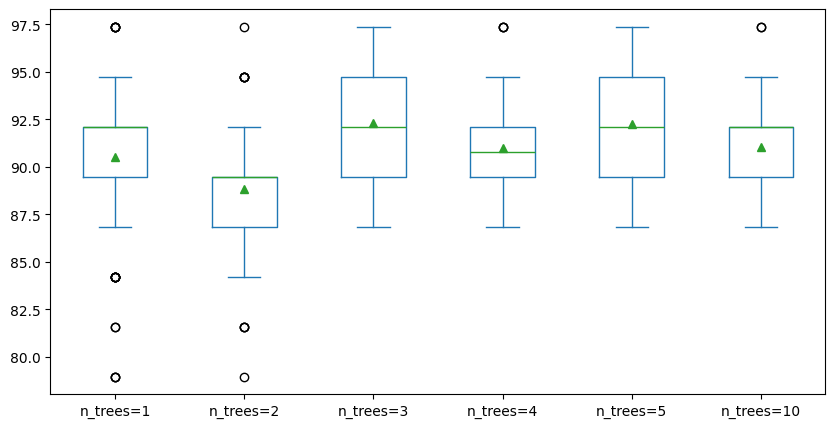

In [27]:
accuracy_data.plot(kind='box', showmeans=True, figsize=(10,5))
plt.show()

Опишите, какой из вариантов лучше по медианной точности. Какой из алгоритмов стабильнее (меньше вариация)?

## Проблема разбиения на выборки

Зафиксируем 10 деревьев, проверим вариацию в зависимости от разбивки на обучение/тест.

In [34]:
accuracy_array = []
for j in range(n_runs):
    train, test = train_test_split(data, test_size=0.25)
    rf = RandomForestClassifier(n_estimators = 10)
    rf.fit(train[attributes], train[labels])
    predicted_labels = rf.predict(test[attributes])
    accuracy_array.append( accuracy_score(test[labels],
                                          predicted_labels)*100)

accuracy_data = pd.DataFrame(accuracy_array)

accuracy_data.describe()

,0
count,100.000000
mean,94.894737
std,3.147689
min,84.210526
25%,92.105263
50%,94.736842
75%,97.368421
max,100.000000


<Axes: >

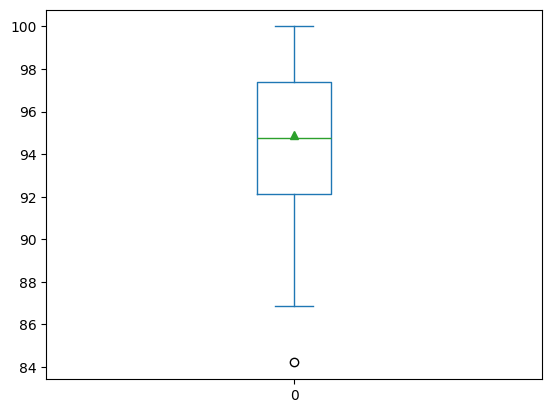

In [35]:
accuracy_data.plot(kind='box', showmeans=True)

Какой можно сделать вывод про процедуру разделения выборки?

Процедура случайного разделения выборки (train_test_split) при каждом прогоне показывает, что качество модели может варьироваться в зависимости от того, как именно мы разделили данные.

# Самостоятельно

Найти оптимальное число деревьев по среднему по разбивке и по запускам RF.

n_trees = [1, 15], n_runs = 40

Построить график изменения точности от числа деревьев.

*Примечание. Вычисления займут много времени.*

Обработка: n_estimators = 1
Обработка: n_estimators = 2
Обработка: n_estimators = 3
Обработка: n_estimators = 4
Обработка: n_estimators = 5
Обработка: n_estimators = 6
Обработка: n_estimators = 7
Обработка: n_estimators = 8
Обработка: n_estimators = 9
Обработка: n_estimators = 10
Обработка: n_estimators = 11
Обработка: n_estimators = 12
Обработка: n_estimators = 13
Обработка: n_estimators = 14
Обработка: n_estimators = 15


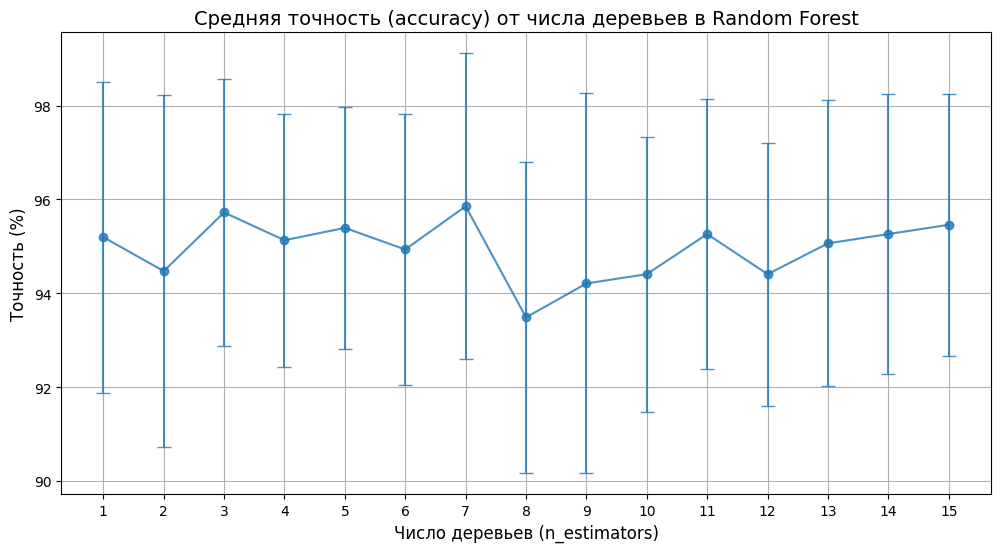

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = sns.load_dataset('iris')

attributes = data.drop(columns=['species']).columns.values
labels = 'species'

# Параметры эксперимента
n_trees_list = list(range(1, 16))  # от 1 до 15 деревьев
n_runs = 40  # количество прогонов для усреднения

# Словарь для хранения результатов
results = {n: [] for n in n_trees_list}

# Основной цикл
for n_trees in n_trees_list:
    print(f"Обработка: n_estimators = {n_trees}")
    for run in range(n_runs):
        # Новое разбиение на обучение/тест
        train, test = train_test_split(data, test_size=0.25)

        # Модель
        model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
        model.fit(train[attributes], train[labels])

        # Предсказание и оценка
        pred = model.predict(test[attributes])
        acc = accuracy_score(test[labels], pred) * 100

        # Сохранение результата
        results[n_trees].append(acc)

# Преобразование в DataFrame
results_df = pd.DataFrame(results)

# Вычисление средних значений и стандартных отклонений
mean_accuracies = results_df.mean()
std_accuracies = results_df.std()

# Построение графика
plt.figure(figsize=(12, 6))
plt.errorbar(mean_accuracies.index, mean_accuracies.values,
             yerr=std_accuracies.values, fmt='-o', capsize=5, alpha=0.8)
plt.title("Средняя точность (accuracy) от числа деревьев в Random Forest", fontsize=14)
plt.xlabel("Число деревьев (n_estimators)", fontsize=12)
plt.ylabel("Точность (%)", fontsize=12)
plt.grid(True)
plt.xticks(n_trees_list)
plt.show()